<h1 style="text-align:center;;font-weight:bold"><i>BITS CAPSTONE PROJECT</i></h1>
<h3 style="text-align:center;;font-weight:bold"><i>Employee Attrition Prediction</i></h3>

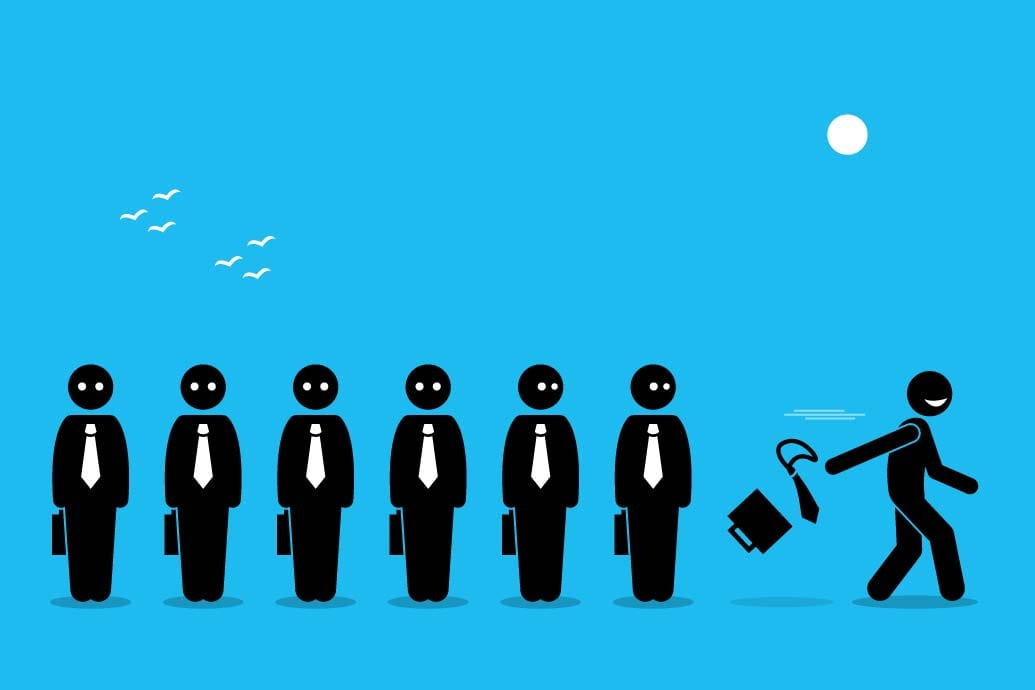

### Importing the Required Libraries

In [73]:
#import all the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.style as style; style.use('fivethirtyeight')

%matplotlib inline

### Reading the dataset

In [74]:
#function to read the file
def read_file(path,file_name):
    import glob
    import os
    file_patteren=file_name
    print(f'File: {file_patteren}')
    files = glob.glob(path +file_patteren, recursive = True)
    if(len(files)==0):
        print('File does not exits')
        return 0
    else:
        for file in files:
            file_text,file_extension=os.path.splitext(file)
            if(file_extension=='.csv'):
                print('Loading CSV file...')
                df=pd.read_csv(file)
            elif(file_extension=='.xlsx'):
                print('Loading excel file...')
                df=pd.read_excel(file)
            elif(file_extension=='.txt'):
                print('Loading text file')
                df=pd.read_csv(file)
            elif(file_extension=='.json'):
                print('Loading the JSON file')
                df=pd.read_json(file)
            else:
                df=pd.read_csv(file)
    return df

In [75]:
#reading the file
df=read_file('./','train.csv')
df.head()

File: train.csv
Loading CSV file...


,MMM-YY,EmpID,Age,Gender,City,EducationLevel,Salary,DateofJoining,LastWorkingDate,JoiningDesignation,Designation,TotalBusinessValue,QuarterlyRating
0,01-01-2016,1,28,Male,C23,Master,57387,24-12-2015,NaN,1,1,2381060,2
1,01-02-2016,1,28,Male,C23,Master,57387,24-12-2015,NaN,1,1,-665480,2
2,01-03-2016,1,28,Male,C23,Master,57387,24-12-2015,11-03-2016,1,1,0,2
3,01-11-2017,2,31,Male,C7,Master,67016,06-11-2017,NaN,2,2,0,1
4,01-12-2017,2,31,Male,C7,Master,67016,06-11-2017,NaN,2,2,0,1


### Reading the new incoming data and merging with the original one

In [76]:
df1=read_file('./','test.csv')

File: test.csv
File does not exits


In [77]:
if(df1!=0):
    frames = [df, df1]
    result = pd.concat(frames)
    df = result.sort_values(by=['EmpID', 'MMM-YY'], ascending=True)
    df.to_csv('train.csv')

    file = 'test.csv'
    if(os.path.exists(file) and os.path.isfile(file)):
        os.remove(file)
        print("file deleted")
    else:
        print("file not found")

In [78]:
def BasicStat(dataframe):
    print('--------------Basic Description of Data Frame--------------')
    print()
    #total count
    print('Total records in data frame: {}\nTotal Columns:{}'.format(dataframe.shape[0],dataframe.shape[1]))
    print()
    #missing values
    print('Total Missing value in each Column:\n{}\n'.format(dataframe.isnull().sum()))
    print()
    #duplicate count
    print('Total Duplicate Count:{}'.format(dataframe.duplicated().sum()))
    print()
    #data types
    print('Data Types of each column:\n{}'.format(dataframe.dtypes))

In [79]:
BasicStat(df)

--------------Basic Description of Data Frame--------------

Total records in data frame: 19104
Total Columns:13

Total Missing value in each Column:
MMM-YY                    0
EmpID                     0
Age                       0
Gender                    0
City                      0
EducationLevel            0
Salary                    0
DateofJoining             0
LastWorkingDate       17488
JoiningDesignation        0
Designation               0
TotalBusinessValue        0
QuarterlyRating           0
dtype: int64


Total Duplicate Count:0

Data Types of each column:
MMM-YY                object
EmpID                  int64
Age                    int64
Gender                object
City                  object
EducationLevel        object
Salary                 int64
DateofJoining         object
LastWorkingDate       object
JoiningDesignation     int64
Designation            int64
TotalBusinessValue     int64
QuarterlyRating        int64
dtype: object


In [80]:
def dfDescription(dataframe):
    #Discreption of Data Frame
    print(f'Statistics of Data Frame:\n')
    result=dataframe.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T #lamda function is to avoid printing scientific notation
    result['median']=dataframe.median()
    return result

In [81]:
dfDescription(df)

Statistics of Data Frame:



,count,mean,std,min,25%,50%,75%,max,median
EmpID,19104.00000,1415.59113,810.70532,1.00000,710.00000,1417.00000,2137.00000,2788.00000,1417.0
Age,19104.00000,34.65028,6.26447,21.00000,30.00000,34.00000,39.00000,58.00000,34.0
Salary,19104.00000,65652.02513,30914.51534,10747.00000,42383.00000,60087.00000,83969.00000,188418.00000,60087.0
JoiningDesignation,19104.00000,1.69054,0.83698,1.00000,1.00000,1.00000,2.00000,5.00000,1.0
Designation,19104.00000,2.25267,1.02651,1.00000,1.00000,2.00000,3.00000,5.00000,2.0
TotalBusinessValue,19104.00000,571662.07496,1128312.21846,-6000000.00000,0.00000,250000.00000,699700.00000,33747720.00000,250000.0
QuarterlyRating,19104.00000,2.00890,1.00983,1.00000,1.00000,2.00000,3.00000,4.00000,2.0


## Preprocessing

### Missing Values

In [82]:
#missing value
null_df=pd.DataFrame(df.isnull().sum())
null_df.columns=['Null Records']
null_df=null_df[null_df['Null Records']!=0]
null_df

,Null Records
LastWorkingDate,17488


<AxesSubplot:>

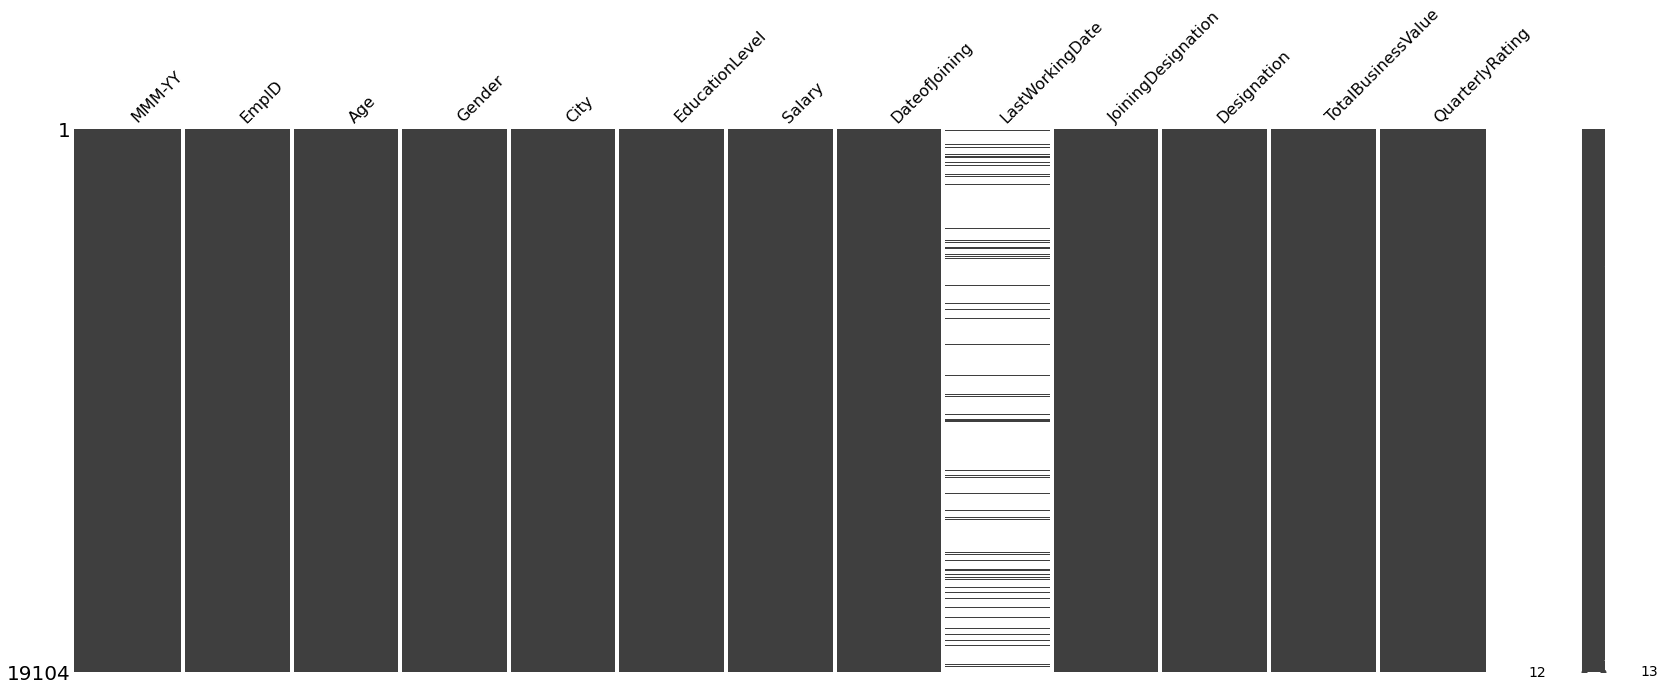

In [83]:
#vsualizing Missing value
import missingno as msno
msno.matrix(df)
#msno.bar(dataframe)

Column LastWorkingDate contains missing value which also indicates that employee didn't resign. None of the other columns have missing values

### Missing Value Imputation

### ***Types of Imputations***
* **1.** **Univariate imputation**, or mean imputation, is when values are imputed using only the target variable. Ex- **SimpleImputer**
* **2.** **Multivariate imputation:** Impute values depending on other factors, such as estimating missing values based on other variables using linear regression.

* **MICE or Multiple Imputation by Chained Equation:** Sometimes data missing in a dataset and is related to the other features and can be predicted using other feature values.It cannot be imputed with general ways of using mean, mode, or median.For doing this linear regression is applied.

* **KNN or K-Nearest Neighbor Imputation:** K-Nearest Neighbor is one of the simplest and easiest technique of imputation in machine learning. It works on Euclidean distance between the neighbor cordinates X and y to know how similar data is.

In [84]:
#function to fill missing value using KNN,MICE and Simple Imputer
def MissingValueImputation(dataframe,method):
    from sklearn.impute import SimpleImputer,KNNImputer
    from sklearn.linear_model import LinearRegression
    from fancyimpute import IterativeImputer
    
    #filtering Numeric and Non-numeric columns
    numericCols = dataframe.select_dtypes(include=["number"]).columns
    nonNumericCols = [col for col in dataframe.columns if col not in numericCols]
    data= dataframe[numericCols]
    
    #Instead of printing all the columns,print only those columns having missing value.
    # Creating a dataframe that contain columns that have missing value. 
    null_df=pd.DataFrame(dataframe.isnull().sum())
    null_df.columns=['Null Records']
    null_df=null_df[null_df['Null Records']!=0]
    

    # summarize total missing
    print('Missing value before imputation:\n{}'.format(dataframe[null_df.index].isnull().sum()))
    print()
    
    if(method=='mice'):
        print('Imputation by MICE..')
        lr = LinearRegression()
        imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10)
        imputedData=imp.fit_transform(data)
    elif(method=='knn'):
        print('Imputation by KNN..')
        imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
        imputer.fit(data)
        imputedData= imputer.transform(data)
    else:
        print('Imputation by mean..')
        imputer = SimpleImputer(strategy='mean')
        imputer.fit(data)
        imputedData= imputer.transform(data)
    
    imputed_df = pd.DataFrame(imputedData)
    imputed_df.columns = data.columns
    finalImputedData = pd.concat([imputed_df, dataframe.loc[:, nonNumericCols]], axis=1)
    
    print('Missing value after imputation:\n{}'.format(finalImputedData[null_df.index].isnull().sum()))
    return finalImputedData

### Inducing Missing Values in the dataset

In [85]:
df_with_mv = df[['Age', 'Salary', 'TotalBusinessValue']].copy()
for col in df_with_mv.columns:
    if(col in ['TotalBusinessValue']):
        df_with_mv.loc[df_with_mv.sample(frac=0.05).index, col] = np.nan

In [86]:
df_with_mv.isnull().sum()

Age                     0
Salary                  0
TotalBusinessValue    955
dtype: int64

<AxesSubplot:>

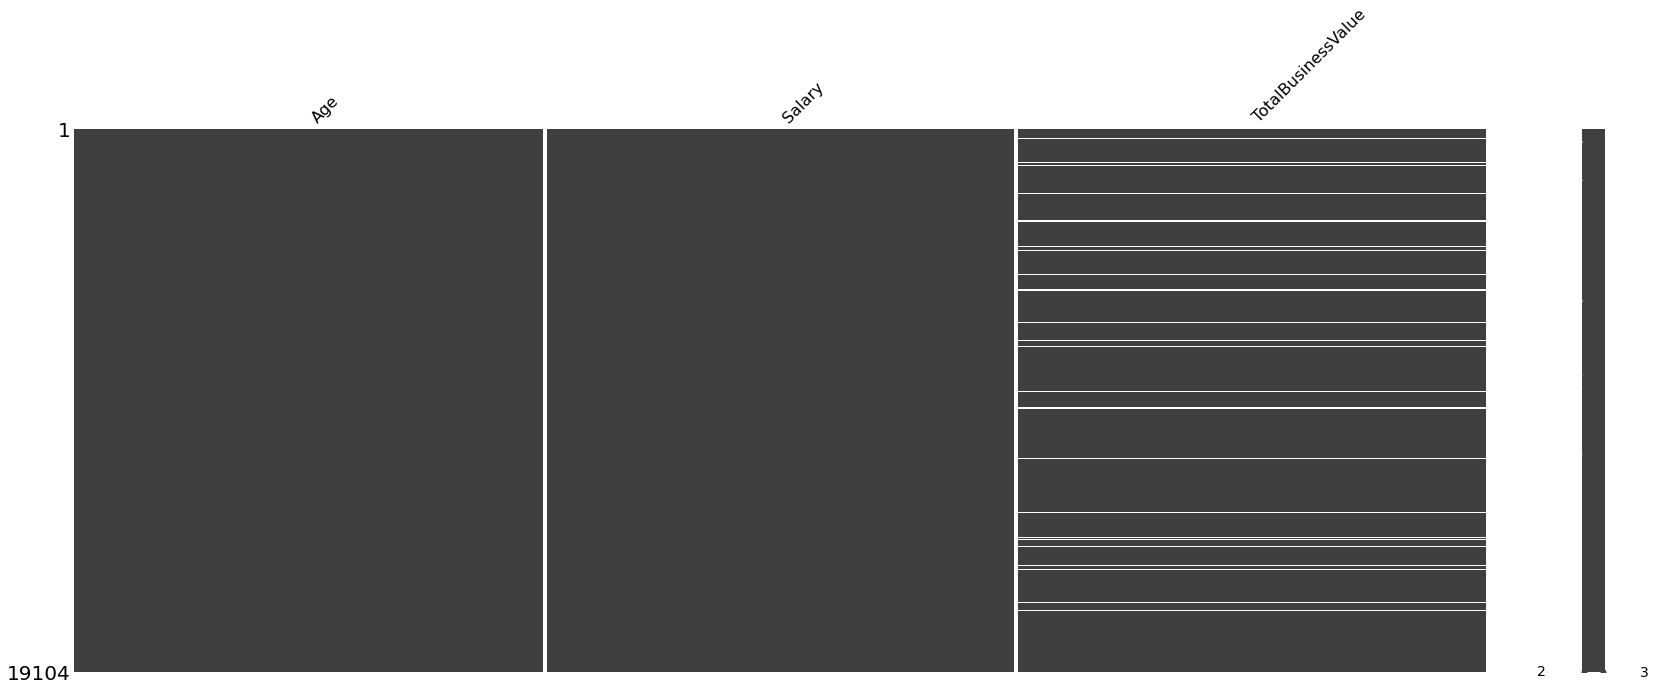

In [87]:
#vsualizing Missing value
import missingno as msno
msno.matrix(df_with_mv)
#msno.bar(dataframe)

5% Missing Values have been induced in columns 'Age', 'Salary, 'Designation', 'TotalBusinessValue' in the dataset

### Comparing Original values with Imputed values from MICE

In [88]:
finalImputedData=MissingValueImputation(df_with_mv,'mice')

Missing value before imputation:
TotalBusinessValue    955
dtype: int64

Imputation by MICE..
Missing value after imputation:
TotalBusinessValue    0
dtype: int64


In [89]:
def ShowImputed(column):
    idx=df_with_mv[df_with_mv[column].isnull()==True].index.tolist()
    imptd_df=pd.concat([pd.DataFrame(df[column]),
                        pd.DataFrame(df_with_mv[column]),
                        pd.DataFrame(finalImputedData[column])],axis=1)
    imptd_df=imptd_df.loc[idx]
    return imptd_df

In [90]:
imptd_df=ShowImputed('TotalBusinessValue')
imptd_df.head()

,TotalBusinessValue,TotalBusinessValue,TotalBusinessValue
17,0,NaN,633286.629795
53,0,NaN,249488.799579
55,0,NaN,410638.879568
56,100000,NaN,542357.464666
102,103800,NaN,367808.763190


## Feature Engineering

### Adding Feature for Quarters to see the trend in each Quarter for 2016 and 2017

In [91]:
# new dataframe to see the trend in each quarter for 2016 and 2017
def QuarterDF():
    df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
    #making a seperate dataframe by unique employee id and Q1---Q8 empty column
    emp=df['EmpID'].unique().tolist()
    quarter_df=pd.DataFrame(emp)
    quarter_df.columns=['EmpID']
    q=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']
    for i in q:
        quarter_df[i]=np.nan
    
    # make a seperate dataframe for each employee and take required index value for that emplyoyee
    # iterate through unique year and get the Quarter
    # for 2016 quarter value will go from Q1 to Q4 and for 2017 Q5 to Q8
    for e in emp:
        IDF=df[df['EmpID']==e]
        idx=quarter_df[quarter_df['EmpID']==e].index.tolist()[0]
        for index,y in enumerate(IDF['MMM-YY'].dt.year.tolist()):
            if(y==2016):
                quarter_numer=pd.to_datetime(IDF['MMM-YY'].iloc[index]).quarter
                if(quarter_numer==1):
                    quarter_df['Q1'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                elif(quarter_numer==2):
                    quarter_df['Q2'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                elif(quarter_numer==3):
                    quarter_df['Q3'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                else:
                    quarter_df['Q4'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
            elif(y==2017):
                quarter_numer=pd.to_datetime(IDF['MMM-YY'].iloc[index]).quarter
                if(quarter_numer==1):
                    quarter_df['Q5'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                elif(quarter_numer==2):
                    quarter_df['Q6'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                elif(quarter_numer==3):
                    quarter_df['Q7'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                else:
                    quarter_df['Q8'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
            else:
                pass
    return quarter_df

In [92]:
quarter_df=QuarterDF()
quarter_df.head()

,EmpID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,4,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [93]:
df[df['EmpID']==2][['MMM-YY','EmpID','QuarterlyRating']]

,MMM-YY,EmpID,QuarterlyRating
3,2017-01-11,2,1
4,2017-01-12,2,1


### Determining the variation in a column for each Employee

In [94]:
#Function to Determining the variation
#shift is used to shift the value by index
def ChangeInValue(dataframe,column):
    new_column=column+'_change'
    dataframe[new_column]=dataframe.groupby(['EmpID'])[column].transform(lambda y: y - y.shift(1)).apply(lambda x: 1 if x>0 else (-1 if x<0 else 0))
    #dataframe[new_column]=dataframe[new_column].apply(lambda x: 'Remain Same/Decreased' if x<=0 else 'Increased')
    print('Change in Value Column added..')
    return dataframe

In [95]:
def BinningCol(df, col):
    label = [1,2,3]
    df['bins_'+col] = pd.cut(df[col],3)
    print('intervals in ', col)
    print(':',df['bins_'+col].unique())
    return pd.cut(df[col],3,labels=label)

In [96]:
# # function for Salary & Age binning
# def BinningSallary(s):
#     if(s<20000):
#         return 1
#     elif(20000<s<40000):
#         return 2
#     else:
#         return 3

# def BinningAge(s):
#     if(s<40):
#         return 1
#     elif(40<s<50):
#         return 2
#     else:
#         return 3

### Creating New relevant Features from Existing Features

In [97]:
def NewColumn(dataframe):
    # adding target column
    dataframe['Resign']=np.where(dataframe['LastWorkingDate'].isnull()==True,0,1)
    
    # Hike Column
    dataframe['SalaryChangeAmount']=dataframe.groupby(['EmpID'])['Salary'].transform(lambda y:y-y.shift(1)).apply(lambda x: x if x>0 else (-x if x<0 else 0))
    dataframe['Hike%']=(dataframe['SalaryChangeAmount'])*100//dataframe['Salary']
    dataframe.drop('SalaryChangeAmount',axis=1,inplace=True)
    
   # Promotion Column (Yes/No)
    dataframe['Promotion']=dataframe['Designation']-dataframe['JoiningDesignation']    
    
    # Replacing Promotion values to Yes and No
    dataframe['Promotion']=dataframe['Promotion'].replace(to_replace =[1,2,3,4], value ="Yes").replace(to_replace =[0], value ="No").astype('category')
    print('Resign,Hike and Promotion column added,..')
    
    # Sallary Binning
    dataframe['BinnedSalary']= BinningCol(dataframe, 'Salary') #applying the function
    print('BinnedSalary column added,..')
    
    # Age binning
    dataframe['BinnedAge']= BinningCol(dataframe, 'Age') #applying the function
    print('BinnedAge column added,..')


    return dataframe

In [98]:
#function to change the datatype of column
def ChangeDataTypes(dataframe,column,column_type):
    import datetime as datetime
    for c in column:
        if(column_type=='category'):
            dataframe[column]=dataframe[column].astype('category')
        elif(column_type=='date'):
            #dataframe[column]=pd.to_datetime(dataframe[column],format='%d-%m-%Y').dt.tz_localize(None)
            dataframe[column]=pd.to_datetime(dataframe[column],format='%d-%m-%Y')
        elif(column_type=='float'):
            dataframe[column]=dataframe[column].astype('float')
        else:
            dataframe[column]=dataframe[column].astype('int64')
    #print(f'Data types have been changed to {column_type}..')
    return dataframe

In [99]:
# def ExtractDate(dataframe):
#     #dataframe['MMM-YY']=pd.to_datetime(df['MMM-YY'],format='%d-%m-%Y')
#     dataframe['MMM-YY_year']=dataframe['MMM-YY'].dt.year
#     dataframe['MMM-YY_month']=dataframe['MMM-YY'].dt.month
#     #dataframe['quarter'] = dataframe['MMM-YY'].dt.quarter
#     print('Year,Month extracted...')
#     return dataframe

In [100]:
def remove_duplicate(dataframe,column_name):
    #Aggregating the TotalBusinessValue before removing the duplicates
    total_tvb=dataframe[['EmpID','TotalBusinessValue']].groupby('EmpID').sum()
    total_tvb.reset_index(drop = True,inplace = True)
    
    #Cumulative sum of TotalBusinessValue_change before removing the duplicates
    # total_tvbc=dataframe[['EmpID','TotalBusinessValue_change']].groupby('EmpID').sum()
    # total_tvbc.reset_index(drop = True,inplace = True)
    
    #remove duplicate
    print(f'Before Removing the duplicates:{len(dataframe)}')
    print('Removing the Duplicate')
    dataframe=dataframe.drop_duplicates([column_name],keep='last')
    dataframe.reset_index(drop = True,inplace = True)
    print(f'After Removing the duplicates:{len(dataframe)}')
    
    #replacing the TotalBusinessValue value by Aggrgating values
    dataframe['TotalBusinessValue']=total_tvb['TotalBusinessValue']
    #dataframe['TotalBusinessValue_change']=total_tvbc['TotalBusinessValue_change']
    return dataframe

In [101]:
def RetentionYear(dataframe):
    cnt = 0
    dataframe['DateofJoining'] = pd.to_datetime(dataframe['DateofJoining'])
    dataframe['LastWorkingDate'] = pd.to_datetime(dataframe['LastWorkingDate'])
    dataframe['MMM-YY'] = pd.to_datetime(dataframe['MMM-YY'])
    for j, val in enumerate(dataframe.columns.values):
        k = j
    dataframe.insert(k+1, "Retention_years", np.nan)
    for i in range(0,len(dataframe['LastWorkingDate'])):
        f1 = pd.isnull(dataframe['LastWorkingDate'].loc[i])
        if(f1 == False):   
            dataframe["Retention_years"].loc[i]=(dataframe['LastWorkingDate'].loc[i]- dataframe['DateofJoining'].loc[i])/np.timedelta64(1, 'Y')
            if(pd.isnull(dataframe["Retention_years"].loc[i])):
                dataframe["Retention_years"].loc[i]=(dataframe["MMM-YY"].loc[i]-dataframe["DateofJoining"].loc[i])/np.timedelta64(1, 'Y')
        else:
            dataframe["Retention_years"].loc[i]=(dataframe["MMM-YY"].loc[i]-dataframe["DateofJoining"].loc[i])/np.timedelta64(1, 'Y')
            if(dataframe["MMM-YY"].loc[i] == dataframe["DateofJoining"].loc[i]):
                dataframe["Retention_years"].loc[i] = 0
                
        if(dataframe["Retention_years"].loc[i] < 0):
            cnt = cnt + 1
            dataframe["Retention_years"].loc[i] = 0
    
    print("No. of Cases where Date of Joining is later than Last Working Date:",cnt)
    dataframe["Retention_years"]=dataframe['Retention_years'].round(decimals=2)
    return dataframe

def PromoPerYr(dataframe):
    for j, val in enumerate(dataframe.columns.values):
        k = j
    dataframe.insert(k+1, "PromoPerYr", np.nan)
    for i in range(0,len(dataframe['Retention_years'])):
        if(dataframe['Retention_years'].loc[i] != 0):
            dataframe['PromoPerYr'].loc[i] = (dataframe['Designation'].loc[i] -dataframe['JoiningDesignation'].loc[i])/dataframe['Retention_years'].loc[i] 
            
    return dataframe

In [102]:
def CountUnexpectedlyLargePromotions(df):
    df['Designation'] = pd.to_numeric(df['Designation'])
    df['JoiningDesignation'] = pd.to_numeric(df['JoiningDesignation'])
    cnt = 0
    for i in range(0,len(df['JoiningDesignation'])):
        if((df['Designation'].loc[i] - df['JoiningDesignation'].loc[i]) > df['Retention_years'].loc[i]):
            cnt = cnt + 1

    print('No. of cases where employees have got more than 1 promotion per year: ', cnt)
    
    return cnt

In [103]:
# Single function that include all the function to process the file
def Preprocess(path,file):
    
    # read the file
    df=read_file(path,file)
    print()
    
    # Change in value
    columns=['Salary','Designation','TotalBusinessValue','QuarterlyRating']
    for c in columns:
        df=ChangeInValue(df,c)
    print()
    
    # Adding columns
    df=NewColumn(df)
    print()
    
    #changing the data types into category
    cat_column=['Gender','EducationLevel','QuarterlyRating','Resign']
    df=ChangeDataTypes(df,cat_column,'category')
    print()
    
    ##changing the data types into date
    column=['MMM-YY','DateofJoining','LastWorkingDate']
    for col in column:
        df=ChangeDataTypes(df,col,'date')
    print()
    
    # Calling function to Extract year,month and quarter
#     df=ExtractDate(df)
#     print()
    
    
    # Remove the duplicate
    df=remove_duplicate(df,'EmpID')
    print()
    
     #Add the retention year column
    df=RetentionYear(df)
    
    #Add the PromoPerYr year column
    df=PromoPerYr(df)
    
    count = CountUnexpectedlyLargePromotions(df)
    
    print('Max no. of promotions per year: ',df['PromoPerYr'].max())
    
    cat_column=['JoiningDesignation','Designation',]
    df=ChangeDataTypes(df,cat_column,'category')
    print()
    
    df['YearsOfExperience'] = round(df['Retention_years'])
    
    df.drop(['bins_Age', 'bins_Salary'],axis=1,inplace=True)
    
    return df

In [104]:
pre_df=Preprocess('./','train.csv')
pre_df.head()

File: train.csv
Loading CSV file...

Change in Value Column added..
Change in Value Column added..
Change in Value Column added..
Change in Value Column added..

Resign,Hike and Promotion column added,..
intervals in  Salary
: [(10569.329, 69970.667], (69970.667, 129194.333], (129194.333, 188418.0]]
Categories (3, interval[float64, right]): [(10569.329, 69970.667] < (69970.667, 129194.333] < (129194.333, 188418.0]]
BinnedSalary column added,..
intervals in  Age
: [(20.963, 33.333], (33.333, 45.667], (45.667, 58.0]]
Categories (3, interval[float64, right]): [(20.963, 33.333] < (33.333, 45.667] < (45.667, 58.0]]
BinnedAge column added,..



Before Removing the duplicates:19104
Removing the Duplicate
After Removing the duplicates:2381

No. of Cases where Date of Joining is later than Last Working Date: 60
No. of cases where employees have got more than 1 promotion per year:  40
Max no. of promotions per year:  33.333333333333336



,MMM-YY,EmpID,Age,Gender,City,EducationLevel,Salary,DateofJoining,LastWorkingDate,JoiningDesignation,...,TotalBusinessValue_change,QuarterlyRating_change,Resign,Hike%,Promotion,BinnedSalary,BinnedAge,Retention_years,PromoPerYr,YearsOfExperience
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,...,1,0,1,0.0,No,1,1,0.21,0.0,0.0
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,...,0,0,0,0.0,No,1,1,0.07,0.0,0.0
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,...,-1,0,1,0.0,No,1,2,0.39,0.0,0.0
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,...,-1,0,1,0.0,No,1,1,0.16,0.0,0.0
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,...,-1,0,0,0.0,No,2,1,0.34,0.0,0.0


In [105]:
# pre_df['LastWorkingDate'].fillna('1970-01-01', inplace=True)
# pre_df['LastWorkingDate']  = pd.to_datetime(pre_df['LastWorkingDate']).dt.tz_localize(None)
# pre_df['Tenure(M)'] = np.where(pre_df['LastWorkingDate']==pd.to_datetime('1970-01-01'),pre_df['MMM-YY'],pre_df['LastWorkingDate'])
# pre_df['YearsOfExperience']=pre_df['Tenure(M)'].dt.year-pre_df['DateofJoining'].dt.year

In [106]:
#merging the two dataframe pre_df and quarter_df
final_df=pre_df.merge(quarter_df,on='EmpID')
final_df.head()

,MMM-YY,EmpID,Age,Gender,City,EducationLevel,Salary,DateofJoining,LastWorkingDate,JoiningDesignation,...,PromoPerYr,YearsOfExperience,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,...,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,...,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,...,0.0,0.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


### ***EDA and Visualization***

In [107]:
# function for count plot
def CountPlot(dataframe,column,target_column):
    count=len(column)
    fig = plt.figure(figsize=(15,10))
    a = round((count/2)+0.5)  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter

    #iterating each columns and creating a count plot
    for i in column:
        plt.subplot(a, b, c)
        plt.title('{}'.format(i),fontsize=12,fontweight='bold',y=1.1)
        plt.xlabel(i)
        plots=sns.countplot(dataframe[i],hue=dataframe[target_column])
        plt.legend(loc='upper right',shadow=True)
        plt.ylabel(f"No of people who left based on {i}",fontsize=9)
        #below code is to print count on each bar
        for bar in plots.patches: 
            plots.annotate(format(bar.get_height(), ''),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()),ha='center', va='center', 
                       size=10, xytext=(0, 8), 
                       textcoords='offset points')
        c = c + 1
    plt.subplots_adjust(right=1.2,wspace=0.5,hspace=0.8)
    plt.show()

In [108]:
pre_df['Hike%'].value_counts()

0.0     2369
9.0        5
10.0       4
8.0        2
7.0        1
Name: Hike%, dtype: int64

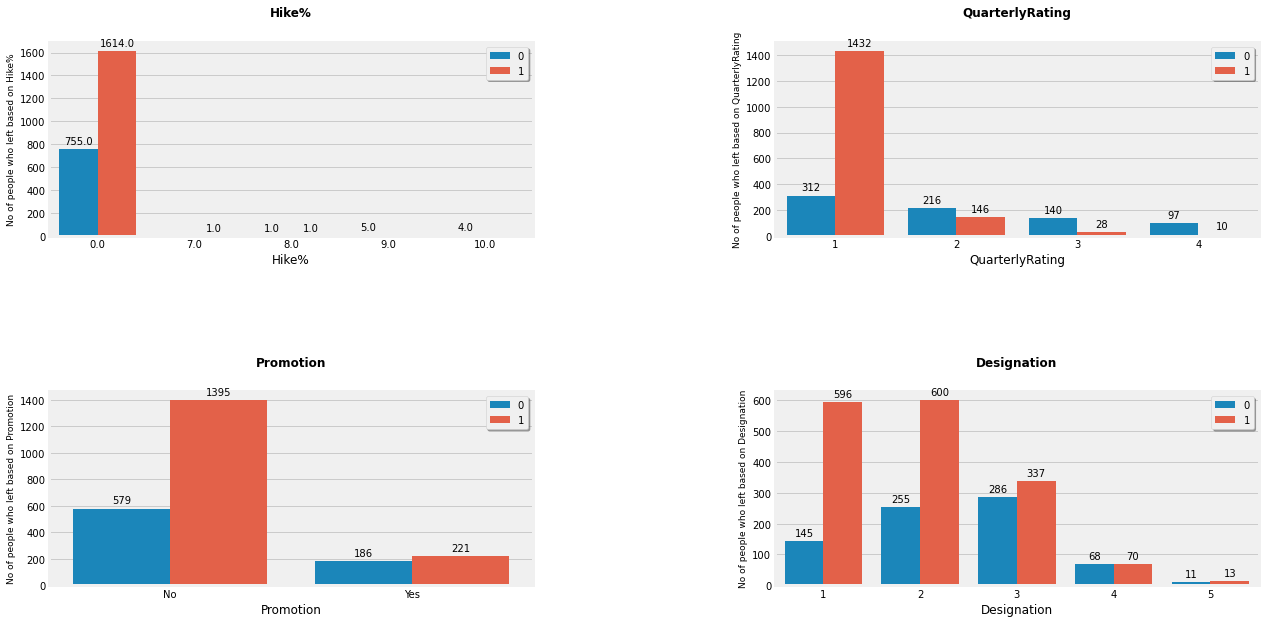

In [109]:
#column=['Designation','QuarterlyRating','LastWorkingDate_year','LastWorkingDate_month']
column=['Hike%','QuarterlyRating','Promotion','Designation']
CountPlot(pre_df,column,'Resign')

* **1.** People are more likely to resign if they haven't recieved any hike.
* **2.** People are more likely to resign if they have 1 rating.
* **3.** People are more likely to resign if they did not get any promotion.
* **4.** People who are on the junior position are likely to resign.

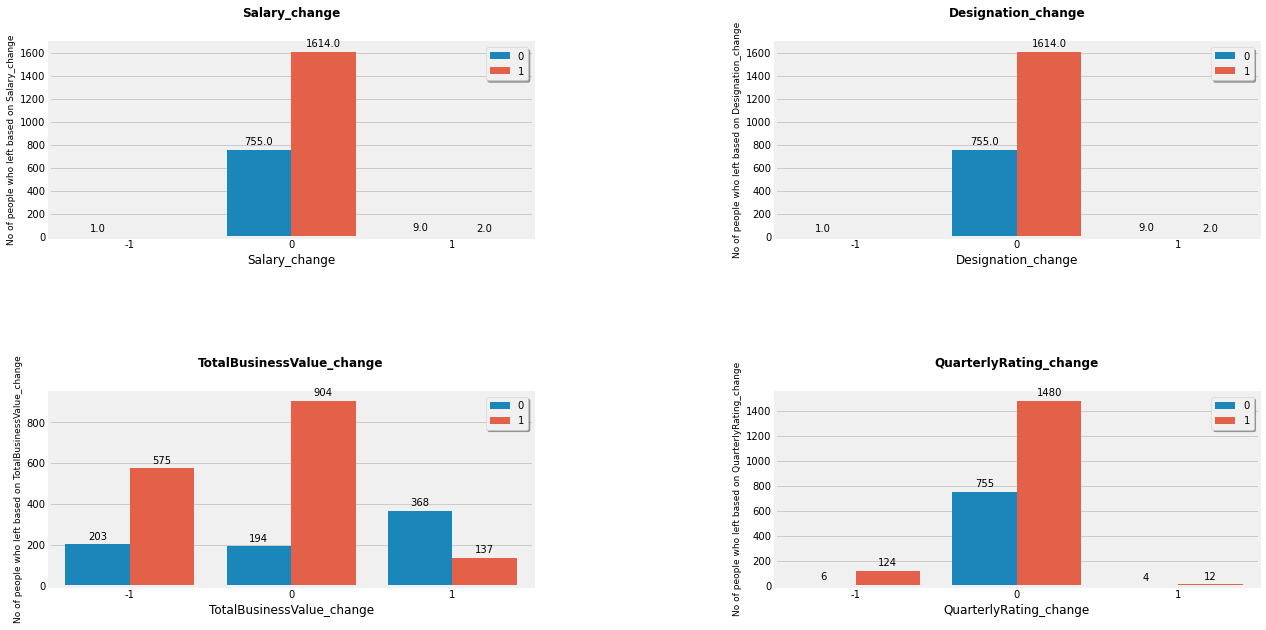

In [110]:
column=['Salary_change','Designation_change','TotalBusinessValue_change','QuarterlyRating_change']
CountPlot(pre_df,column,'Resign')

* **1.** If there is no change in salary and designation then they are more likely to resign.
* **2.** If there is no change in business value or if the business value decreases then they are more likely to resign.
* **3.** If there is no change Quarterly rating then also they are more likely to resign.

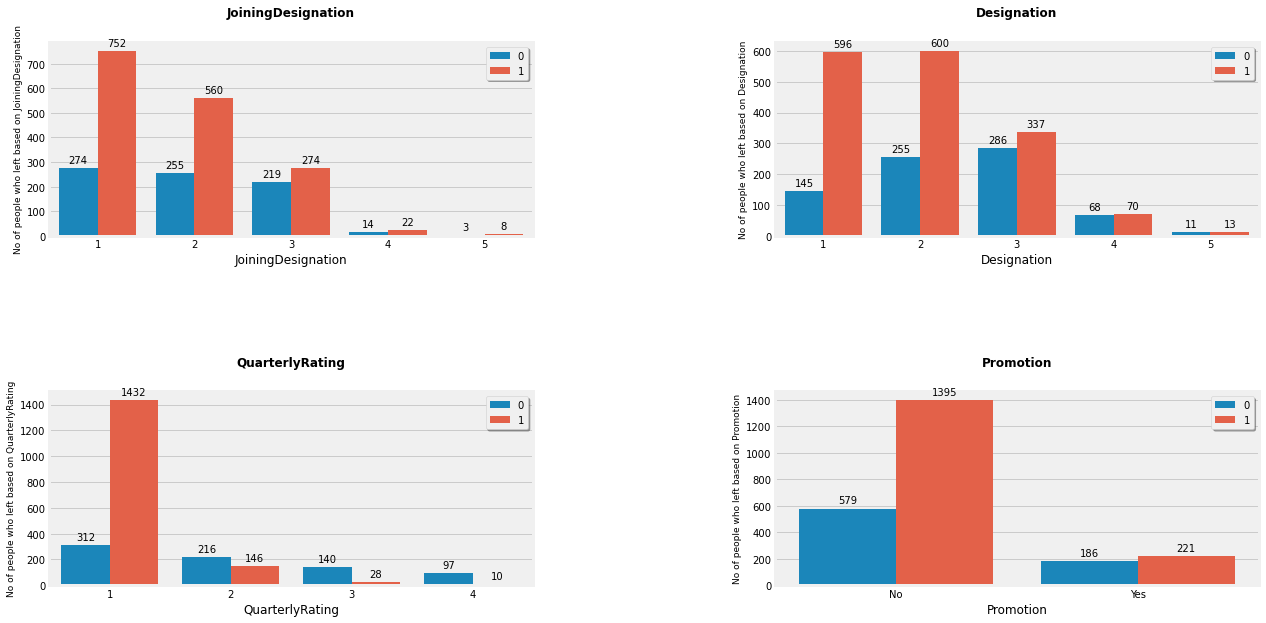

In [111]:
column=['JoiningDesignation','Designation','QuarterlyRating','Promotion']
CountPlot(pre_df,column,'Resign')

In [112]:
# #plot between continous and categroical variable
# plt.figure(figsize=(14,9))
# sns.stripplot(y= pre_df['Salary'], x = pre_df['Resign'],hue=pre_df['TotalBusinessValue_change'])

Swarmplot can be used to see the relation between a continous and categroical variable.

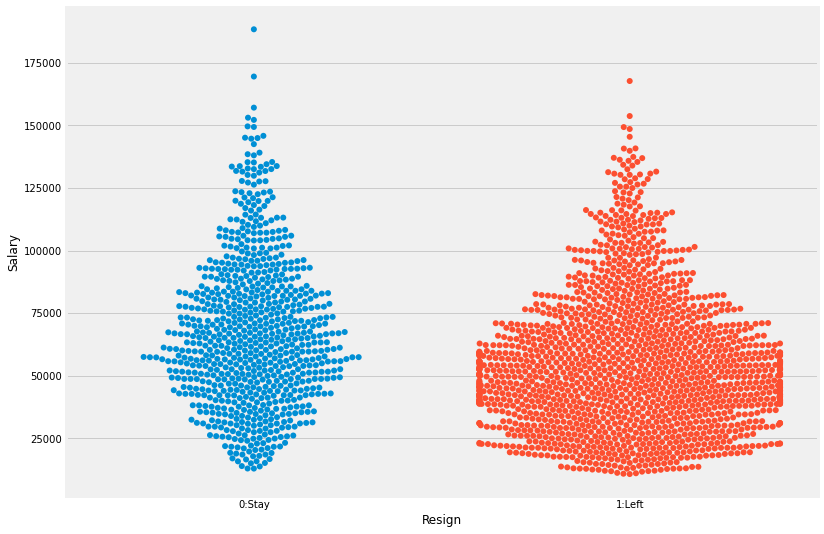

In [113]:
plt.figure(figsize=(12,9))
plots=sns.swarmplot(y = pre_df['Salary'], x = pre_df['Resign'],size=6)

old_ticks =plots.get_xticks().tolist()
new_ticks = ['0:Stay','1:Left']

#Add new ticks to x axis
plt.xticks(range(len(old_ticks)), new_ticks)
plt.show()

From this graph also we can confirm people who have resigned have the salary between 25000 to 75000.

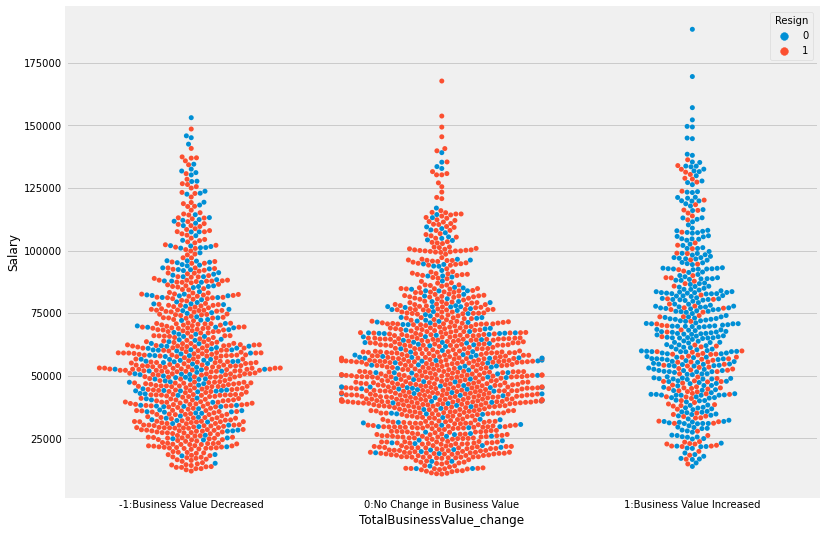

In [114]:
plt.figure(figsize=(12,9))
plots=sns.swarmplot(y = pre_df['Salary'], x = pre_df['TotalBusinessValue_change'],hue=pre_df['Resign'])
old_ticks =plots.get_xticks().tolist()
new_ticks = ['-1:Business Value Decreased','0:No Change in Business Value','1:Business Value Increased']

#Add new ticks to x axis
plt.xticks(range(len(old_ticks)), new_ticks)
plt.show()

People are more likely to resign when their business value remain same or decreased.

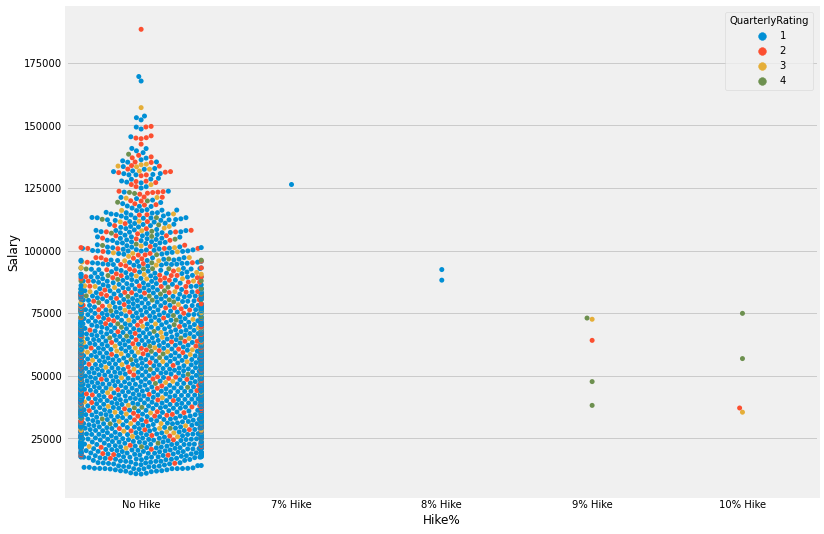

In [115]:
plt.figure(figsize=(12,9))
plots=sns.swarmplot(y = pre_df['Salary'], x = pre_df['Hike%'],hue=pre_df['QuarterlyRating'])

old_ticks =plots.get_xticks().tolist()
new_ticks = ['No Hike','7% Hike','8% Hike','9% Hike','10% Hike']

#Add new ticks to x axis
plt.xticks(range(len(old_ticks)), new_ticks)
plt.show()

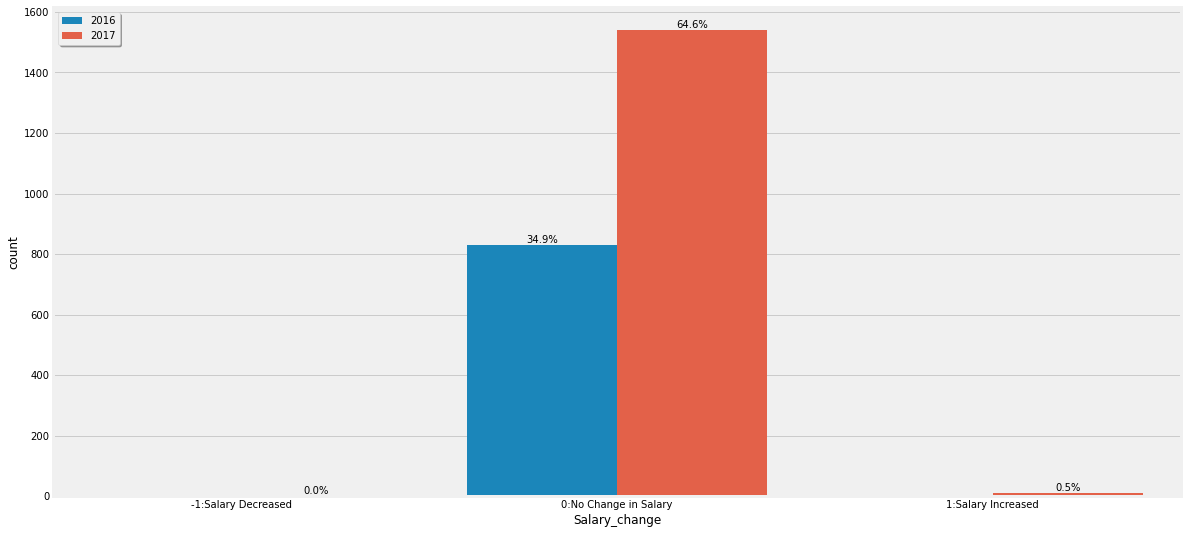

In [116]:
plt.figure(figsize=(18,9))
plots=sns.countplot(pre_df['Salary_change'],hue=pre_df['MMM-YY'].dt.year)
plt.legend(loc='upper left',shadow=True)

old_ticks =plots.get_xticks().tolist()
new_ticks = ['-1:Salary Decreased','0:No Change in Salary','1:Salary Increased']

#Add new ticks to x axis
plt.xticks(range(len(old_ticks)), new_ticks)
ncount=len(pre_df)
for p in plots.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    plots.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.show()

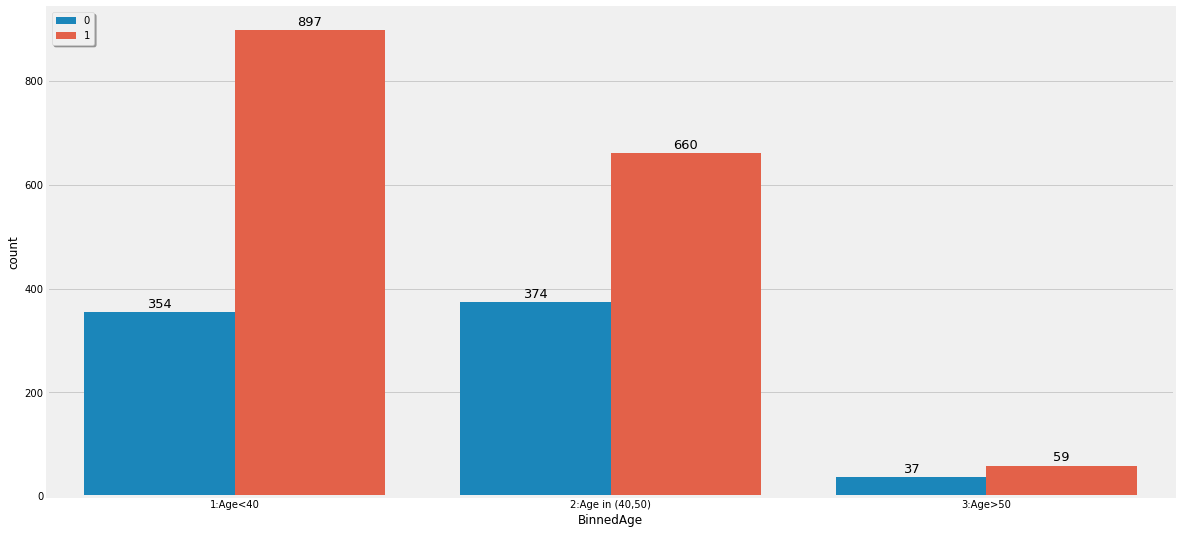

In [117]:
plt.figure(figsize=(18,9))
plots=sns.countplot(pre_df['BinnedAge'],hue=pre_df['Resign'])
plt.legend(loc='upper left',shadow=True)

old_ticks =plots.get_xticks().tolist()
new_ticks = ['1:Age<40','2:Age in (40,50)','3:Age>50']

#Add new ticks to x axis
plt.xticks(range(len(old_ticks)), new_ticks)
for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), ''),  
                           (bar.get_x() + bar.get_width() / 2,  
                            bar.get_height()),ha='center', va='center', 
                           size=13, xytext=(0, 8), 
                           textcoords='offset points') 
plt.show()

There is no salary change for most of the people in 2016 and 2017.

In [118]:
# pre_df['LastWorkingDate'].fillna('1970-01-01', inplace=True)
# pre_df['LastWorkingDate']  = pd.to_datetime(pre_df['LastWorkingDate']).dt.tz_localize(None)
# pre_df['Tenure(M)'] = np.where(pre_df['LastWorkingDate']==pd.to_datetime('1970-01-01'),pre_df['MMM-YY'],pre_df['LastWorkingDate'])
# pre_df['Tenure(M)'].value_counts()

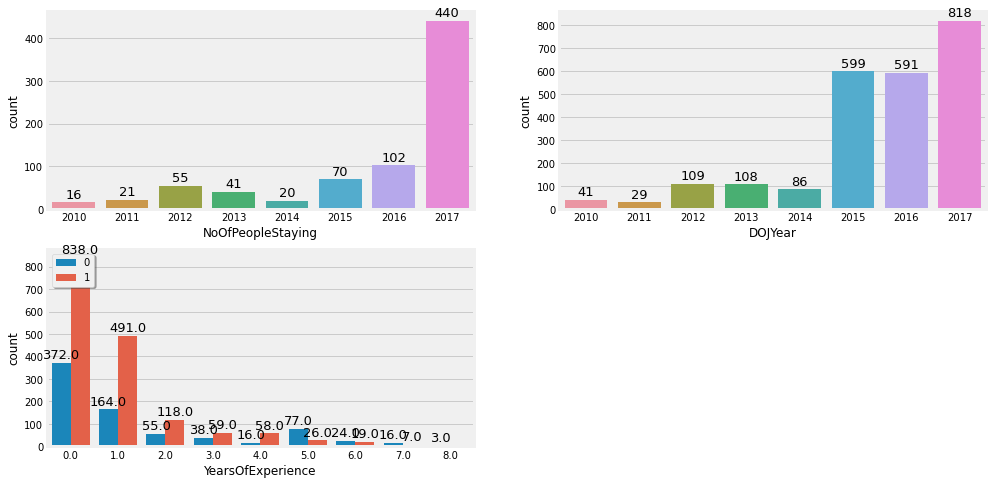

In [119]:
fig = plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
DOJ_DF=pre_df[pre_df['Resign']==0]
DOJ_DF['NoOfPeopleStaying']=DOJ_DF['DateofJoining'].dt.year
plots1=sns.countplot(DOJ_DF['NoOfPeopleStaying'])
#plt.legend(loc='upper left',shadow=True)

#Years of experience 
plt.subplot(2,2,2)
pre_df['DOJYear']=pre_df['DateofJoining'].dt.year
plots3=sns.countplot(pre_df['DOJYear'])
#plt.legend(loc='upper left',shadow=True)

plt.subplot(2,2,3)
#pre_df['YearsOfExperience']=pre_df['Tenure(M)'].dt.year-pre_df['DateofJoining'].dt.year
plots2=sns.countplot(pre_df['YearsOfExperience'],hue=pre_df['Resign'])
plt.legend(loc='upper left',shadow=True)

plots=[plots1,plots2,plots3]
for p in plots:
    for bar in p.patches: 
        p.annotate(format(bar.get_height(), ''),  
                               (bar.get_x() + bar.get_width() / 2,  
                                bar.get_height()),ha='center', va='center', 
                               size=13, xytext=(0, 8), 
                               textcoords='offset points') 
plt.show()
#pre_df.drop('YearsOfExperience',axis=1,inplace=True)

<AxesSubplot:>

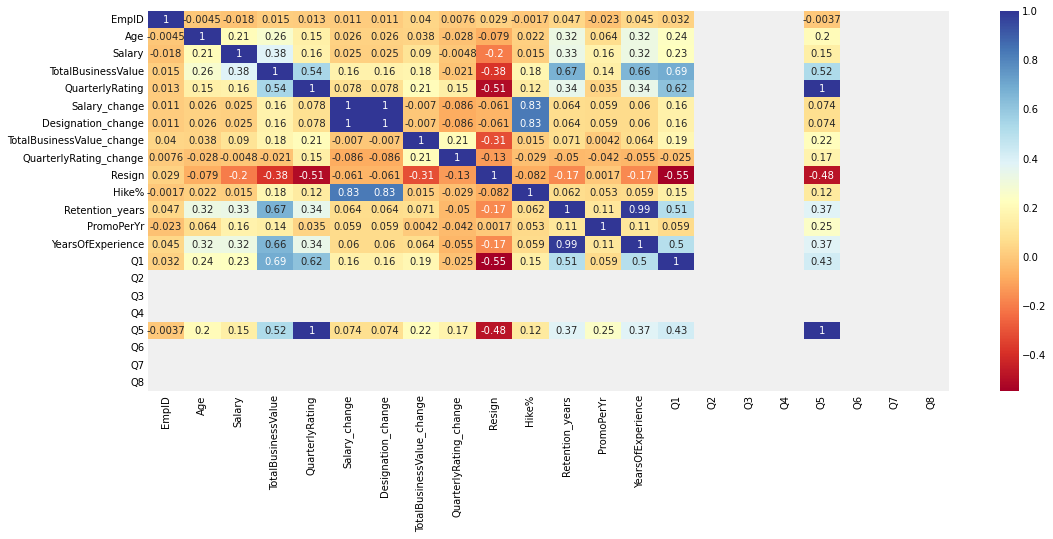

In [120]:
#heatmap
pre_df=ChangeDataTypes(final_df,['Resign','QuarterlyRating'],'int64')
plt.figure(figsize=(16,7))
sns.heatmap(final_df.corr(),annot=True,cmap='RdYlBu')

In [121]:
# Filter for correlation value greater than 0.7
corr=final_df.corr()
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.7) & (sort < 1)]

YearsOfExperience   Retention_years       0.985301
Retention_years     YearsOfExperience     0.985301
Salary_change       Hike%                 0.828417
Hike%               Salary_change         0.828417
Designation_change  Hike%                 0.828417
Hike%               Designation_change    0.828417
dtype: float64

In [122]:
# #heatmap
# plt.figure(figsize=(16,7))
# mask = np.zeros_like(pre_df.corr())
# mask[np.triu_indices_from(mask)] = True

# # Draw the heatmap with the mask
# sns.heatmap(pre_df.corr(),annot=True,fmt='f',cmap='RdYlBu',mask=mask)

<Figure size 1008x504 with 0 Axes>

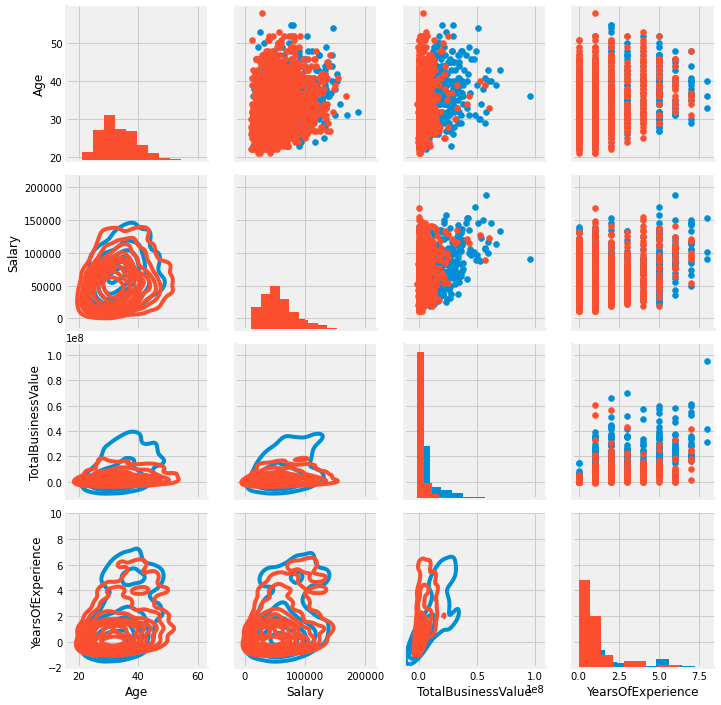

In [123]:
import warnings
warnings.simplefilter(action='ignore')
plt.figure(figsize=(14,7))
#Let us see the pairplot w.r.t to class label and the correlation of different fearures.
column=['Age','Salary','TotalBusinessValue','YearsOfExperience','Resign']
g = sns.PairGrid(pre_df[column], hue="Resign")
colors=['red','yellow']
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

In [124]:
# #pair plot
# #column=['Age','Salary','TotalBusinessValue','TotalBusinessValue_change','Promotion','QuarterlyRating','YearsOfExperience','Resign']
# g=sns.pairplot(pre_df,hue='Resign')
# g.map_diag(sns.kdeplot)
# g.map_upper(plt.scatter)
# g.map_lower(sns.histplot)
# plt.show()

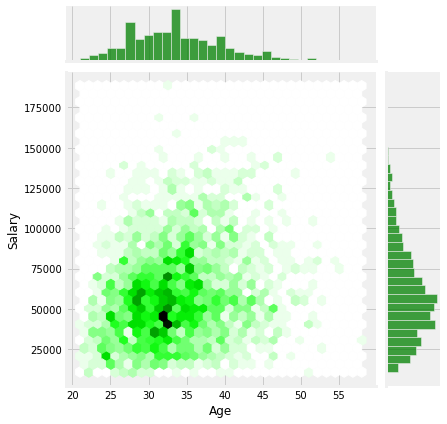

In [125]:
#joint plot between Age and Salary
sns.jointplot(x=pre_df['Age'],y=pre_df['Salary'],color='green',kind='hex')

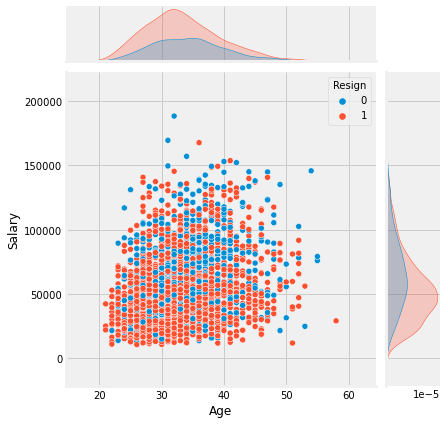

In [126]:
sns.jointplot(x=pre_df['Age'],y=pre_df['Salary'],hue=pre_df['Resign'],color='green')
plt.show()

<Figure size 1008x432 with 0 Axes>

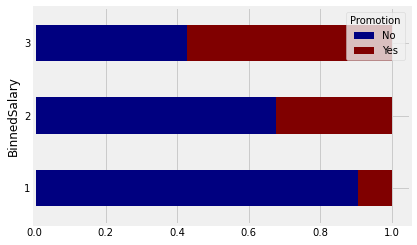

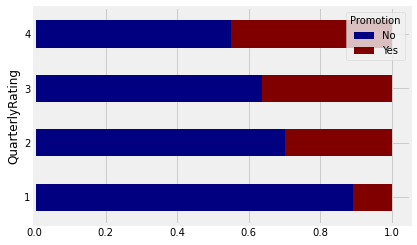

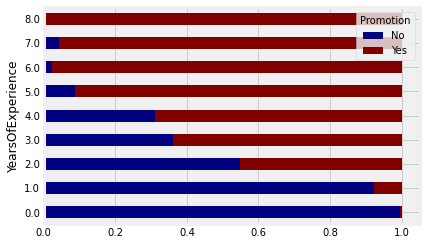

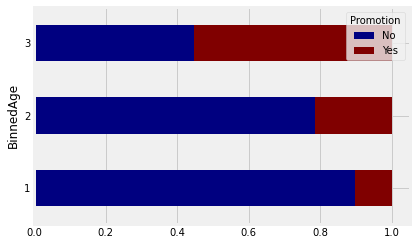

In [127]:
from matplotlib import cm
plt.figure(figsize=(14,6))
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')

columns=['BinnedSalary','QuarterlyRating','Promotion','YearsOfExperience','BinnedAge']
df_bar_plot=pre_df[columns]

for i in df_bar_plot.columns:
    if(i!='Promotion'):
        status=pd.crosstab(df_bar_plot[i],df_bar_plot['Promotion'])
        status.div(status.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True)
    plt.show()

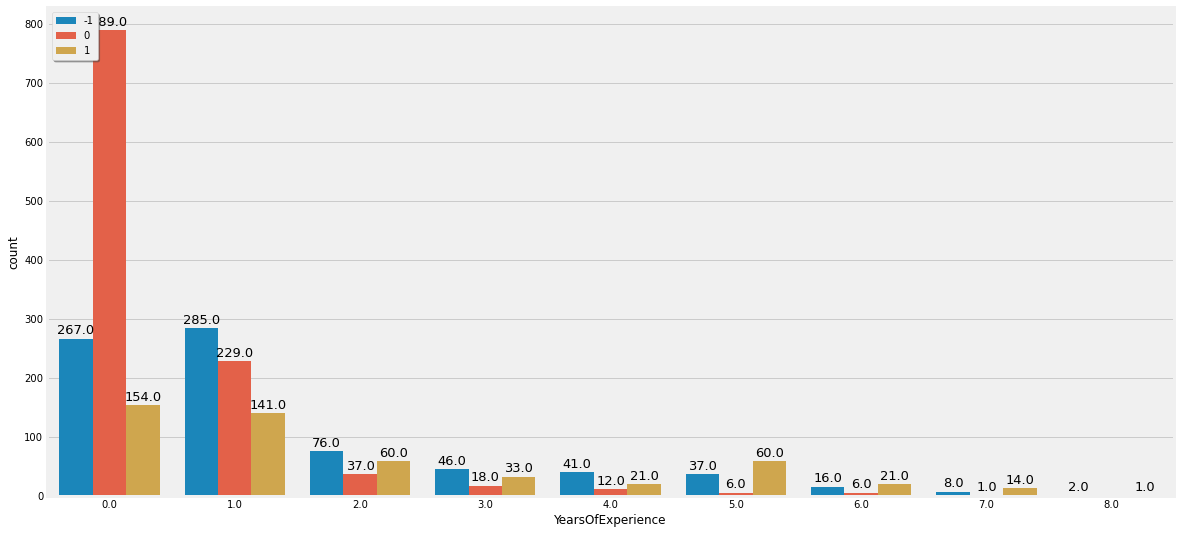

In [128]:
#Years of experience 
plt.figure(figsize=(18,9))
plots=sns.countplot(pre_df['YearsOfExperience'],hue=pre_df['TotalBusinessValue_change'])
plt.legend(loc='upper left',shadow=True)

for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), ''),  
                           (bar.get_x() + bar.get_width() / 2,  
                            bar.get_height()),ha='center', va='center', 
                           size=13, xytext=(0, 8), 
                           textcoords='offset points') 
plt.show()
#pre_df.drop('YearsOfExperience',axis=1,inplace=True)

In [129]:
len(pre_df[(pre_df['BinnedAge']==1)&(pre_df['Resign']==1)])*100/len(pre_df)

37.673246535069296

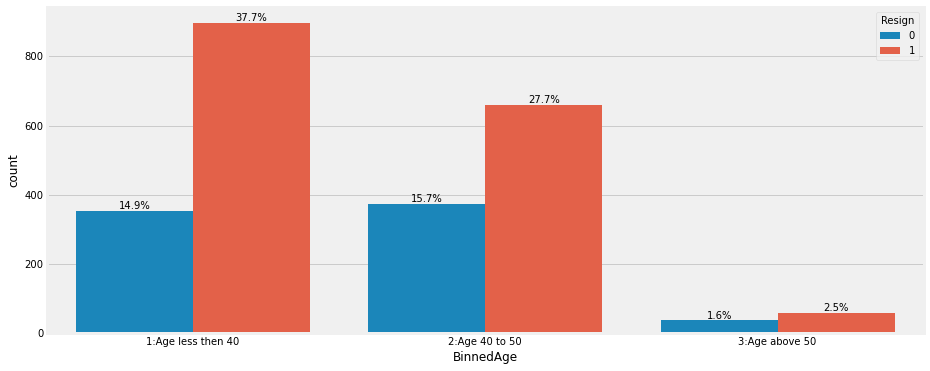

In [130]:
plt.figure(figsize=(14,6))
plots=sns.countplot(pre_df['BinnedAge'],hue=pre_df['Resign'])


old_ticks =plots.get_xticks().tolist()
new_ticks = ['1:Age less then 40','2:Age 40 to 50','3:Age above 50']

#Add new ticks to x axis
plt.xticks(range(len(old_ticks)), new_ticks)
ncount=len(pre_df)
for p in plots.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    plots.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.show()

In [131]:
#Genders who have resigned
df_1s = pre_df[['EmpID','Gender','Resign']]
df_1s = df_1s[df_1s.Resign != 0]

df_per=df_1s[['Gender','Resign']].groupby('Gender').count()
df_per.loc['Female',"%"]=df_per.loc['Female'][0]/len(pre_df)*100
df_per.loc['Male',"%"]=df_per.loc['Male'][0]/len(pre_df)*100
df_per

,Resign,%
Gender,,
Female,668,28.055439
Male,948,39.815204


<AxesSubplot:ylabel='%'>

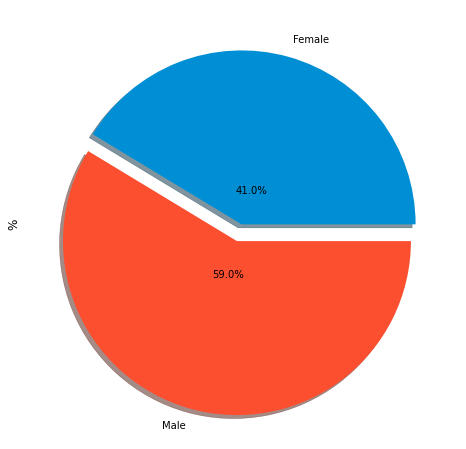

In [132]:
def absolute_value(val):
    a  = str(np.round(val))+'%'
    return a
df_per['%'].plot(kind='pie',figsize=(12,8),autopct=absolute_value,shadow=True,pctdistance=0.2,explode=(0,0.1))

In [133]:
#function for One-hot encoding and Label Encoding
def convertToNumerical(dataframe,columns,encoding):
    from sklearn.preprocessing import LabelEncoder
    from category_encoders import TargetEncoder
    
    if(encoding=='one-hot'):
        #print('One-Hot Encoding..')
        for c in columns:
            new_df='df_'+c
            new_df=pd.get_dummies(dataframe[c])
            dataframe=pd.concat([dataframe,new_df],axis=1)
            dataframe.drop(c,axis=1,inplace=True)
    elif(encoding=='target'):
        #print('Target Encoding...')
        #cat_column=['Gender','EducationLevel','JoiningDesignation','Designation','QuarterlyRating','Resign']
        cat_column=['Resign']
        dataframe=ChangeDataTypes(dataframe,cat_column,'int64')
        tr=TargetEncoder(cols=['City'])
        dataframe=tr.fit_transform(X=dataframe,y=dataframe['Resign'])
        dataframe=ChangeDataTypes(dataframe,cat_column,'category')
    else:
        #print('Label Encoding...')
        for c in columns:
            lr=LabelEncoder()
            dataframe[c]=lr.fit_transform(dataframe[c])
    return dataframe

In [134]:
# Label Encoding
df_t1=final_df.copy()
columns=['EducationLevel','Promotion','Gender','City']
df_t1=convertToNumerical(df_t1,columns,"")
df_t1.head()

,MMM-YY,EmpID,Age,Gender,City,EducationLevel,Salary,DateofJoining,LastWorkingDate,JoiningDesignation,...,PromoPerYr,YearsOfExperience,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,2016-03-01,1,28,1,15,2,57387,2015-12-24,2016-03-11,1,...,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-01,2,31,1,26,2,67016,2017-11-06,NaT,2,...,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,2017-04-01,4,43,1,4,2,65603,2016-12-07,2017-04-27,2,...,0.0,0.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,2016-03-01,5,29,1,28,1,46368,2016-01-09,2016-03-07,1,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-01,6,31,0,2,0,78728,2017-07-31,NaT,3,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [153]:
# Target Encoding
df_test = df_t1.copy()
columns = ['City']
df_test=convertToNumerical(df_test,columns,"target")
df_test.head()

,MMM-YY,EmpID,Age,Gender,City,EducationLevel,Salary,DateofJoining,LastWorkingDate,JoiningDesignation,...,PromoPerYr,YearsOfExperience,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,2016-03-01,1,28,1,0.770270,2,57387,2015-12-24,2016-03-11,1,...,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-01,2,31,1,0.684211,2,67016,2017-11-06,NaT,2,...,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,2017-04-01,4,43,1,0.816901,2,65603,2016-12-07,2017-04-27,2,...,0.0,0.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,2016-03-01,5,29,1,0.706667,1,46368,2016-01-09,2016-03-07,1,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-01,6,31,0,0.703125,0,78728,2017-07-31,NaT,3,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


<AxesSubplot:>

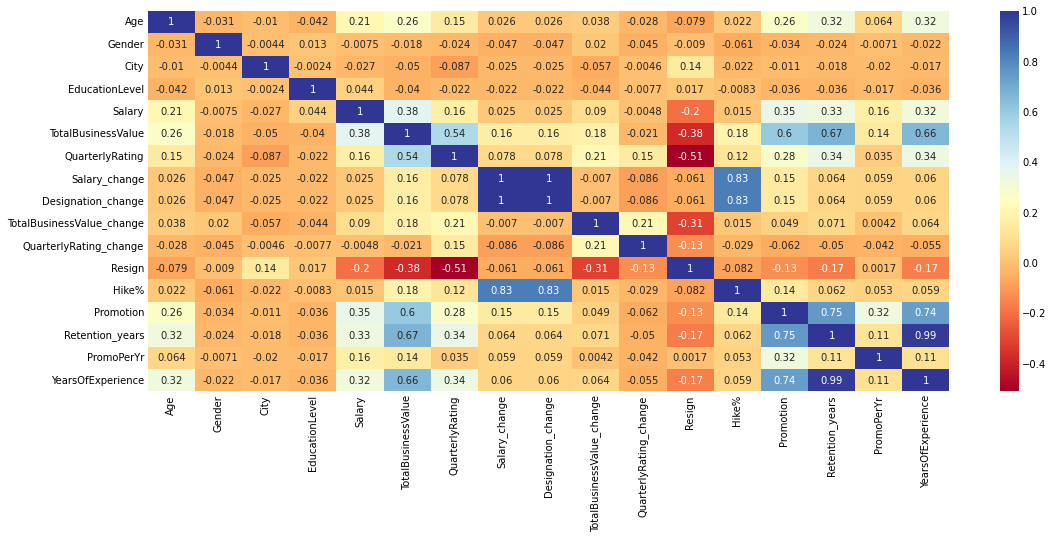

In [154]:
# final #heatmap
drop_columns=['MMM-YY', 'EmpID','Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8','LastWorkingDate']
df_test.drop(drop_columns,axis=1,inplace=True)

df_test=ChangeDataTypes(df_test,['Resign','QuarterlyRating'],'int64')
plt.figure(figsize=(16,7))
sns.heatmap(df_test.corr(),annot=True,cmap='RdYlBu')